# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [928]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer # type: ignore
from joblib import dump


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [929]:
# Tampilkan 5 baris pertama dengan function head.
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


#### informasi setiap feature :
- TransactionID, informasi ID transaksi
- AccountID, informasi ID akun pengguna
- TransactionAmount, informasi jumlah transaksi
- TransactionDate, informasi kapan transaksi dilakukan
- TransactionType, informasi pembayaran transaksi
- Location, informasi tempat transaksi dilakukan
- DeviceID, informasi ID alat yang digunakan untuk melakukan transaksi
- IP Address, informasi IP address pengguna
- MerchantID, informasi ID toko
- Channel, informasi cara pembayaran
- CustomerAge, informasi umur customer
- CustomerOccupation, informasi pekerjaan pelanggan
- TransactionDuration, informasi durasi transaksi (mungkin dalam menit)
- LoginAttempts, informasi upaya masuk 
- AccountBalance, informasi saldo akun (mungkin dalam USD)
- PreviousTransactionDate, informasi transaksi sebelumnya

In [930]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
print("Jumlah Baris & Kolom :", df.shape)
print("\n")
df.info()

Jumlah Baris & Kolom : (2537, 16)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   f

In [931]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

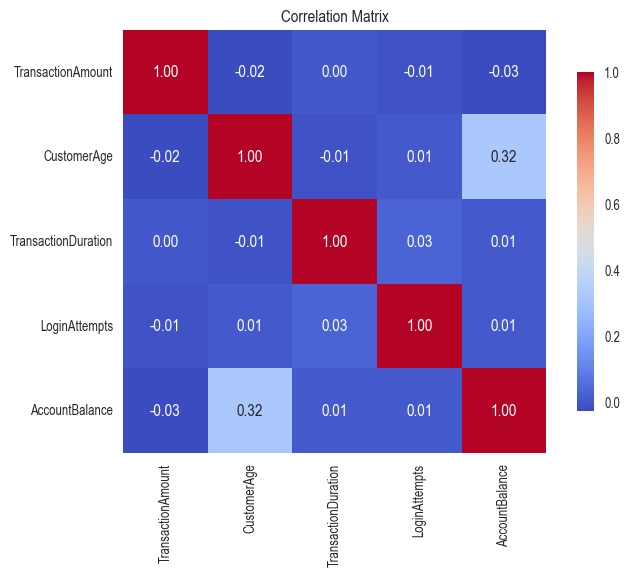

In [932]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
df_number = df.select_dtypes(include=[np.number])
df_number.corr()
sns.heatmap(df_number.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


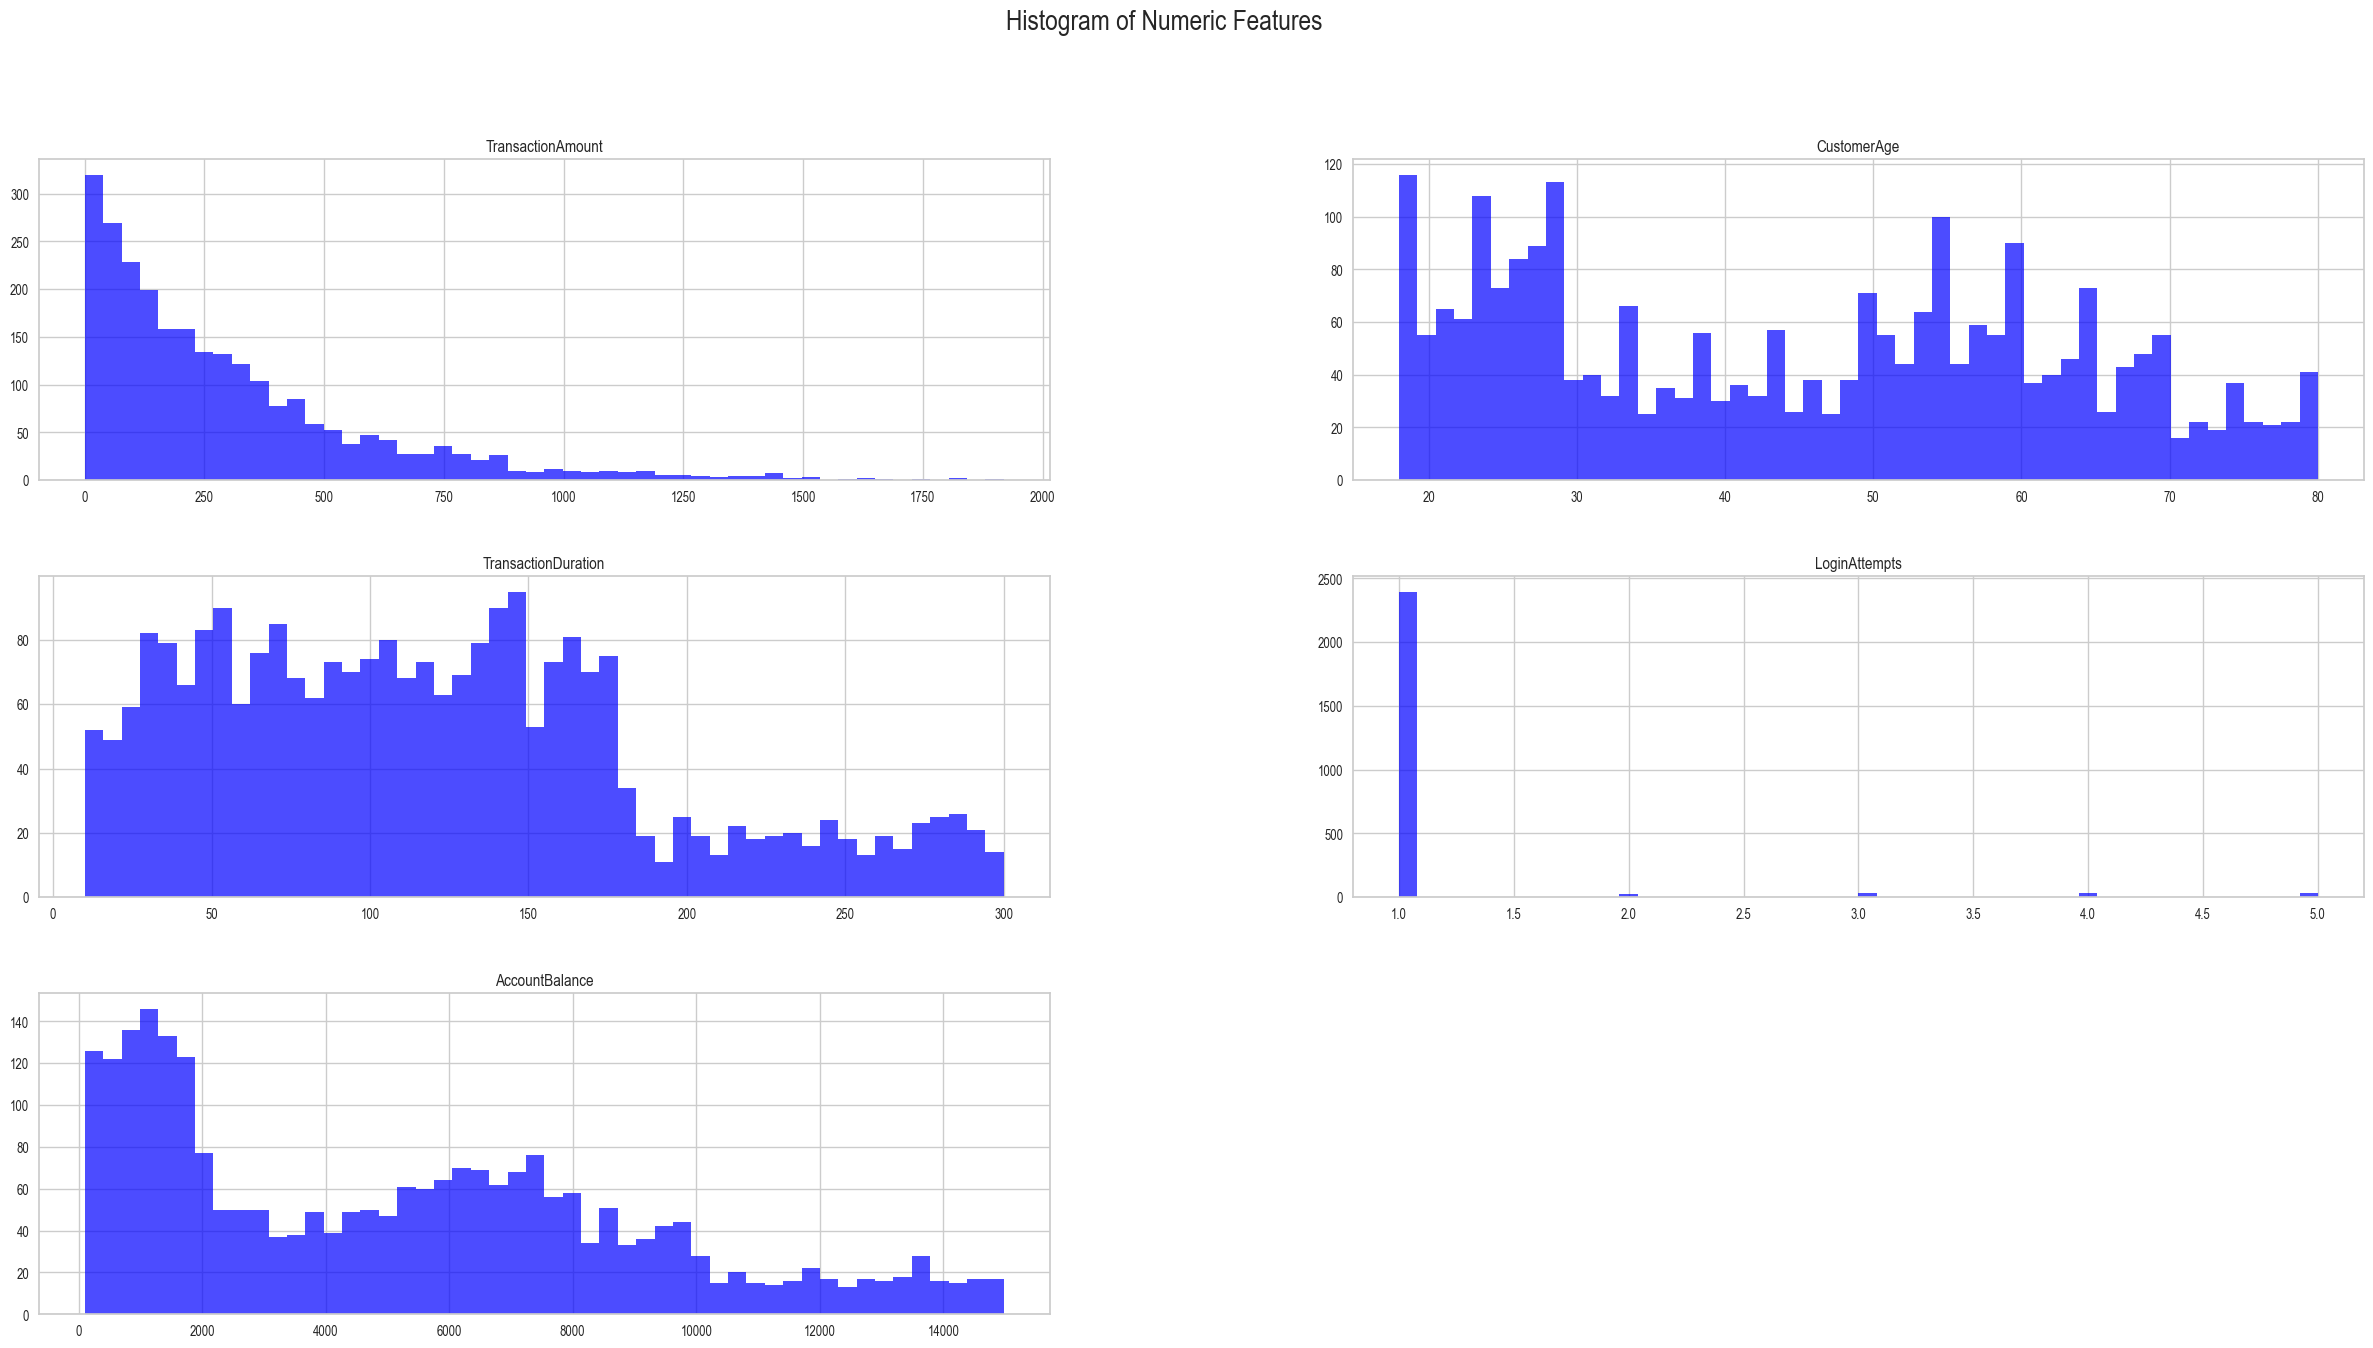

In [933]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(bins=50, figsize=(30, 15), color='blue', alpha=0.7)
plt.suptitle('Histogram of Numeric Features', fontsize=20)
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [934]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Konversi kolom tanggal ke datetime terlebih dahulu
df[['TransactionDate', 'PreviousTransactionDate']] = df[['TransactionDate', 'PreviousTransactionDate']].apply(pd.to_datetime)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [935]:
# Mengecek dataset menggunakan isnull().sum()
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n\n {missing_values}")


Missing values in each column:

 TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [936]:
# Mengecek dataset menggunakan duplicated().sum()
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 21


In [937]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
df.drop(columns=['LoginAttempts'], inplace=True, axis=1)
df_age = df['CustomerAge']
data_number = df.select_dtypes(include='number').columns.tolist()
print(data_number)
scaler = MinMaxScaler()
df[data_number] = scaler.fit_transform(df[data_number])
df['Age'] = df_age
df.head(5)

['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,PreviousTransactionDate,Age
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.336832,2024-11-04 08:08:08,70.0
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.918055,2024-11-04 08:09:35,68.0
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.068637,2024-11-04 08:07:04,19.0
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.569198,2024-11-04 08:09:06,26.0
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.492591,2024-11-04 08:06:39,NaN


In [938]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID', 'IP Address', 'MerchantID', 'DeviceID','AccountID','Location'])
df = df.drop(columns=['TransactionDate', 'PreviousTransactionDate'])
df.sample(5)

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,Age
1042,0.094009,Debit,Branch,0.064516,Student,0.096552,0.048045,22.0
899,0.035626,Debit,Branch,0.177419,Doctor,0.506897,0.926965,29.0
1913,0.021716,Debit,ATM,0.483871,Engineer,0.434483,0.334751,48.0
2110,0.091091,Debit,Online,0.338710,Engineer,0.082759,0.090484,39.0
591,0.103374,Credit,Branch,0.145161,Student,0.255172,0.073593,27.0


In [939]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

# Pilih fitur kategorikal
category_features = df.select_dtypes(include='object').columns

label_encoder = LabelEncoder()
df_lencoder = df.copy()

for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])

# Gantikan kolom kategorikal di df dengan hasil encoding
df[category_features] = df_lencoder[category_features]
df.head(5)

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,Age
0,0.007207,1,0,0.838710,0,0.244828,0.336832,70.0
1,0.195940,1,0,0.806452,0,0.451724,0.918055,68.0
2,0.065680,1,2,0.016129,3,0.158621,0.068637,19.0
3,0.096016,1,2,0.129032,3,0.051724,0.569198,26.0
4,0.006874,0,2,NaN,3,0.648276,0.492591,NaN


In [940]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'AccountBalance',
 'Age']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [941]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2441 entries, 0 to 2536
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2441 non-null   float64
 1   TransactionType      2441 non-null   int64  
 2   Channel              2441 non-null   int64  
 3   CustomerAge          2441 non-null   float64
 4   CustomerOccupation   2441 non-null   int64  
 5   TransactionDuration  2441 non-null   float64
 6   AccountBalance       2441 non-null   float64
 7   Age                  2441 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 171.6 KB


In [942]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2416 entries, 0 to 2511
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2416 non-null   float64
 1   TransactionType      2416 non-null   int64  
 2   Channel              2416 non-null   int64  
 3   CustomerAge          2416 non-null   float64
 4   CustomerOccupation   2416 non-null   int64  
 5   TransactionDuration  2416 non-null   float64
 6   AccountBalance       2416 non-null   float64
 7   Age                  2416 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 169.9 KB


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

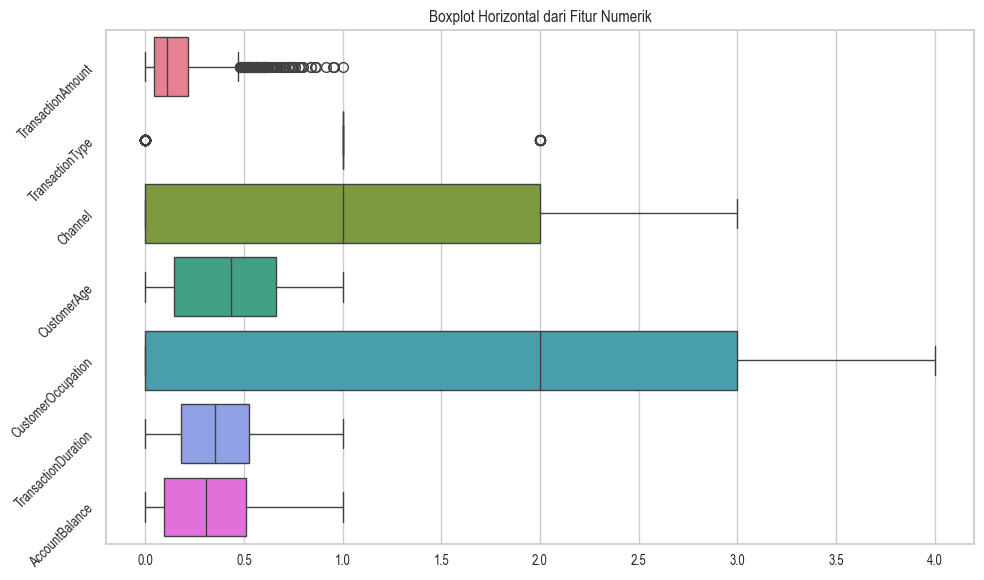

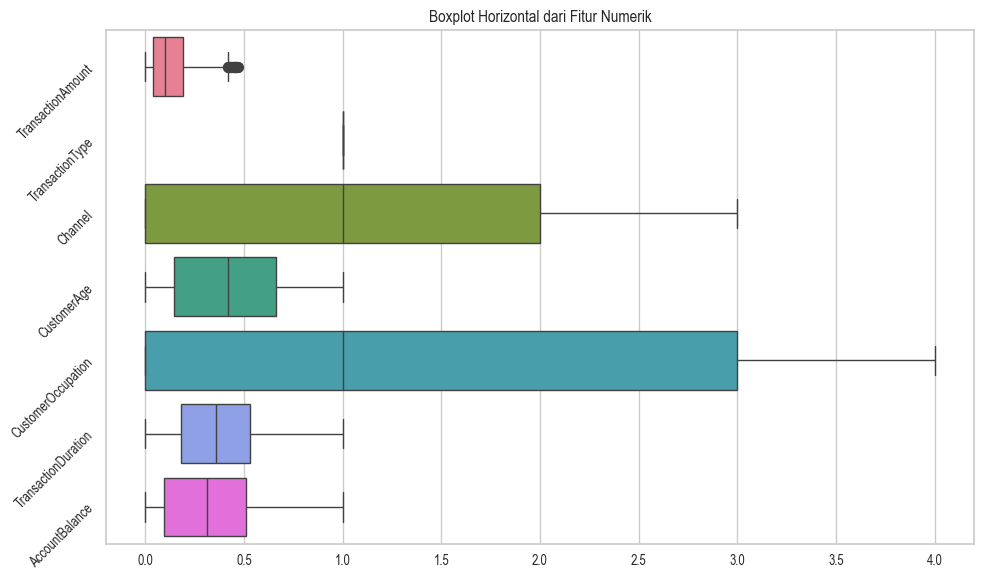

In [943]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
numeric_col ={}

def plot_boxplot(dataFr):
    numeric_col = dataFr.select_dtypes(include='number')
    numeric_col = numeric_col.drop(columns=['Age'])
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=numeric_col, orient='h')
    plt.title('Boxplot Horizontal dari Fitur Numerik')
    plt.yticks(rotation=45)  # Rotasi label jika perlu
    plt.tight_layout()
    plt.show()

nilai_col = df.select_dtypes(include='number').columns
nilai_col = nilai_col.drop('Age')

# Menampilkan boxplot untuk fitur numerik
plot_boxplot(df)

# Hitung batas bawah dan atas berdasarkan IQR
Q1 = df[nilai_col].quantile(0.25)
Q3 = df[nilai_col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter: ambil baris yang tidak punya outlier di kolom manapun
condition = pd.Series(True, index=df.index)

for col in nilai_col:
    lb = lower_bound[col]
    ub = upper_bound[col]
    condition = condition & ((df[col] >= lb) & (df[col] <= ub))

df = df[condition]

# Menampilkan boxplot untuk fitur numerik
plot_boxplot(df)

menggunakan drop untuk menangani outlier karena outlier terjadi pada beberapa feature. jika menggunakan cara lain seperti menggunakan mean atau nilai terdekat kita harus mengetahui situasi pada setiap model. cara drop lebih universal dan dapat digunakan di semua feature. cara ini juga membuat nilai customerAge yang tidak masuk akal (misal lebih dari 200 tahun) karena salah input dapat dihilangkan

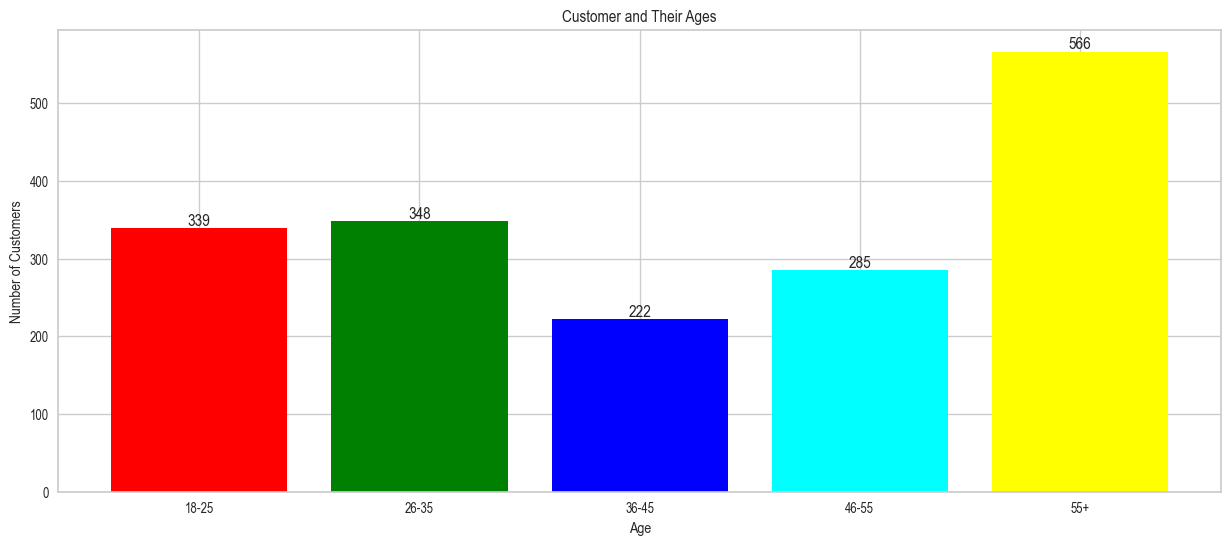

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,CustomerAge_encoded
0,0.007207,1,0,0.838710,0,0.244828,0.336832,5
1,0.195940,1,0,0.806452,0,0.451724,0.918055,5
2,0.065680,1,2,0.016129,3,0.158621,0.068637,1
3,0.096016,1,2,0.129032,3,0.051724,0.569198,2
5,0.047888,1,0,0.000000,3,0.558621,0.045738,1


In [944]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Binning menjadi 5 kelas
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]

# menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
 
# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
plt.show()

bins = [17, 25, 35, 45, 55, df['Age'].max()]
labels = ['18-25', '26-35', '36-45', '46-55', '55+']

# Melakukan binning pada CustomerAge
df['CustomerAge_binned'] = pd.cut(df['Age'], bins=bins, labels=labels)
le = LabelEncoder()
df['CustomerAge_encoded'] = le.fit_transform(df['CustomerAge_binned'])+1

df = df.drop(columns=['CustomerAge_binned','Age'])
df.head(5)

In [945]:
# Mengambil kolom 'TransactionAmount' dan 'TransactionDuration' dari dataset dan menyimpannya dalam array X
data_important = df.iloc[:, [5, 3]].values
 
# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(data_important, columns=['TransactionAmount', 'TransactionDuration']))

      TransactionAmount  TransactionDuration
0              0.244828             0.838710
1              0.451724             0.806452
2              0.158621             0.016129
3              0.051724             0.129032
4              0.558621             0.000000
...                 ...                  ...
1755           0.203448             0.338710
1756           0.286207             0.677419
1757           0.575862             0.483871
1758           0.468966             0.612903
1759           0.031034             0.080645

[1760 rows x 2 columns]


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [946]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df.describe()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,CustomerAge_encoded
count,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,0.131052,1.0,0.921023,0.424679,1.528977,0.378674,0.336247,3.222159
std,0.111322,0.0,0.840971,0.287480,1.158924,0.244670,0.260444,1.538983
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.040552,1.0,0.000000,0.145161,0.000000,0.182759,0.092507,2.000000
50%,0.100586,1.0,1.000000,0.419355,1.000000,0.356897,0.311726,3.000000
75%,0.191297,1.0,2.000000,0.661290,3.000000,0.531034,0.509315,5.000000
max,0.470558,1.0,3.000000,1.000000,4.000000,1.000000,1.000000,5.000000


In [947]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 0 to 2510
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    1760 non-null   float64
 1   TransactionType      1760 non-null   int64  
 2   Channel              1760 non-null   int64  
 3   CustomerAge          1760 non-null   float64
 4   CustomerOccupation   1760 non-null   int64  
 5   TransactionDuration  1760 non-null   float64
 6   AccountBalance       1760 non-null   float64
 7   CustomerAge_encoded  1760 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 123.8 KB


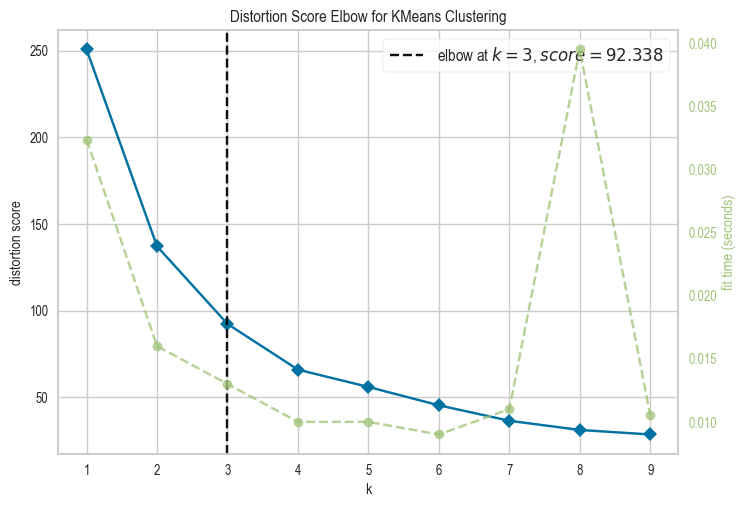

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [948]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(data_important)
visualizer.show()

In [949]:
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters=3, random_state=0)
model_kmeans.fit(data_important)

labels = model_kmeans.labels_
df['labels'] = labels

k = 3

def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        print(f"\nCluster {cluster_id + 1}:")
        for col in cluster_data.columns:
                mean_value = cluster_data[col].mean()
                print(f"Rata-rata {col}: {mean_value:.2f}")
        print("--------------------------------")
        for col in cluster_data.columns:
                median_value = cluster_data[col].median()
                print(f"Median {col}: {median_value:.2f}")
        print("--------------------------------")
        for col in cluster_data.columns:
                max_value = cluster_data[col].max()
                print(f"Nilai maksimum {col}: {max_value:.2f}")


# Analisis karakteristik setiap cluster
analyze_clusters(df, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: 0.13
Rata-rata TransactionType: 1.00
Rata-rata Channel: 0.96
Rata-rata CustomerAge: 0.17
Rata-rata CustomerOccupation: 1.95
Rata-rata TransactionDuration: 0.28
Rata-rata AccountBalance: 0.26
Rata-rata CustomerAge_encoded: 1.79
Rata-rata labels: 0.00
--------------------------------
Median TransactionAmount: 0.10
Median TransactionType: 1.00
Median Channel: 1.00
Median CustomerAge: 0.15
Median CustomerOccupation: 3.00
Median TransactionDuration: 0.27
Median AccountBalance: 0.11
Median CustomerAge_encoded: 2.00
Median labels: 0.00
--------------------------------
Nilai maksimum TransactionAmount: 0.47
Nilai maksimum TransactionType: 1.00
Nilai maksimum Channel: 3.00
Nilai maksimum CustomerAge: 0.44
Nilai maksimum CustomerOccupation: 4.00
Nilai maksimum TransactionDuration: 0.62
Nilai maksimum AccountBalance: 1.00
Nilai maksimum CustomerAge_encoded: 3.00
Nilai maksimum labels: 0.00

Cluster 2:
Rata-rata Transa

Jalankan cell code ini untuk menyimpan model kamu.

In [950]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [951]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df, model_kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.28750372463280177


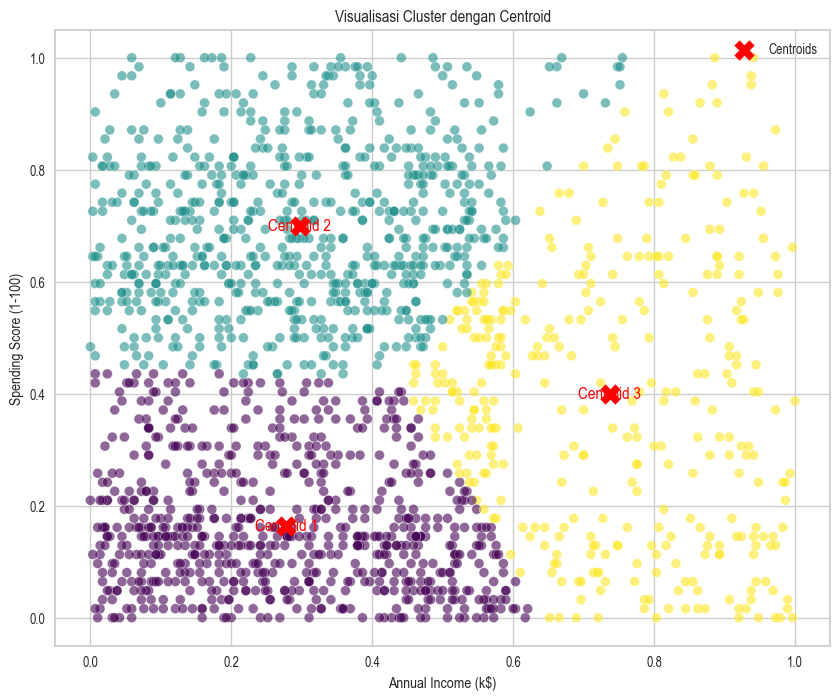

Nilai Centroids:
Centroid 1: Annual Income = 0.28, Spending Score = 0.16
Centroid 2: Annual Income = 0.30, Spending Score = 0.70
Centroid 3: Annual Income = 0.74, Spending Score = 0.40


In [952]:
# Membuat visualisasi hasil clustering
centroids = model_kmeans.cluster_centers_

# Menampilkan centroid dari setiap cluster
plt.figure(figsize=(10, 8))

# Plot data
plt.scatter(data_important[:, 0], data_important[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
 
# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
 
# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
 
# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
 
plt.show()
 
# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

           PC1       PC2  Target
0     2.310828 -0.519514       1
1     2.352642 -0.586726       1
2    -2.830395  0.216241       0
3    -1.929707  0.586694       0
4    -2.795603  0.266240       0
...        ...       ...     ...
1755 -0.138999 -0.669222       0
1756  1.831689  0.313913       1
1757  1.607654 -0.806428       2
1758  1.358010  1.222004       1
1759 -2.818475  0.214887       0

[1760 rows x 3 columns]


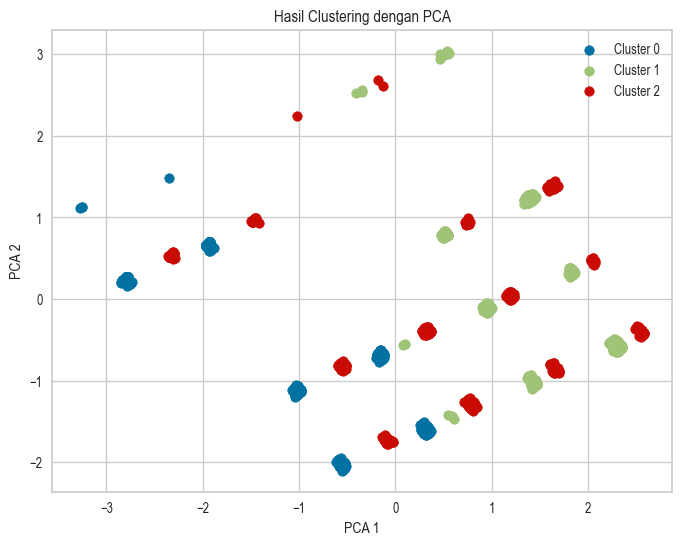

In [954]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
pca_result = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
pca_result['Target'] = model_kmeans.labels_
print(pca_result)

plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = pca_result[pca_result['Target'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Hasil Clustering dengan PCA')
plt.legend()
plt.show()

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Langkah 1: Hitung agregasi numerik
kolom_numerik = df.select_dtypes(include='number').columns
kolom_kategorikal = df[['TransactionType', 'Channel', 'CustomerOccupation']].columns

# Hitung agregasi numerik
agregasi_numerik = df.groupby('labels')[kolom_numerik].agg(['mean', 'min', 'max'])

# Tampilkan tabel dengan styling agar rapi
agregasi_numerik.style\
    .set_caption("Agregasi Mean, Min, Max per Label untuk Fitur Numerik")\
    .format(precision=2)\
    .background_gradient(axis=0, cmap='YlGnBu')\
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', 'Red'),
                   ('font-size', '16px'),
                   ('text-align', 'center'),
                   ('font-weight', 'bold')]}
    ])


<Figure size 1000x600 with 0 Axes>

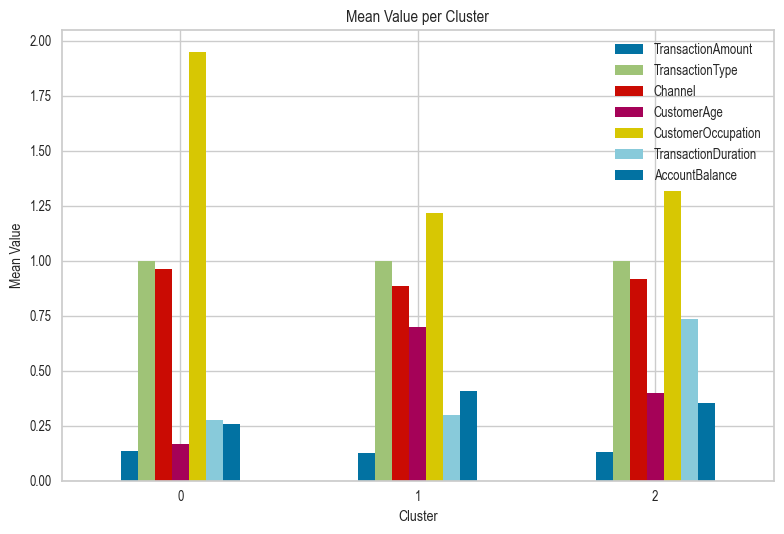



Modus Kategorikal :


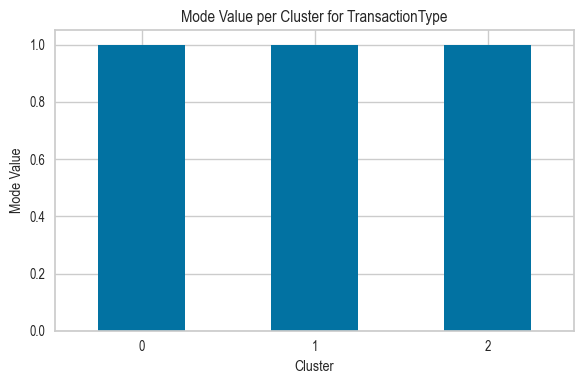

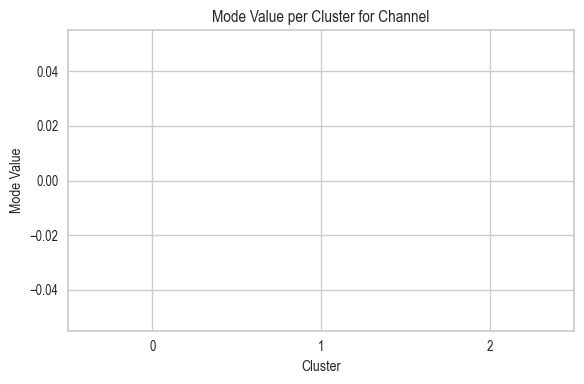

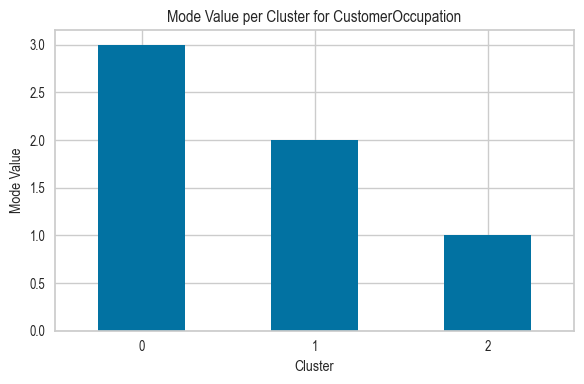

In [ ]:
# Ambil nama kolom numerik kecuali 'TransactionAmount', 'CustomerAge', dan 'labels'
kolom_numerik = [col for col in df.select_dtypes(include='number').columns if col not in ['labels','CustomerAge_encoded']]

mean_per_cluster = df.groupby('labels')[kolom_numerik].mean()
plt.figure(figsize=(10, 6))
mean_per_cluster.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Mean Value per Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n")

print("Modus Kategorikal :")
for col in kolom_kategorikal:
    mode_per_cluster = df.groupby('labels')[col].agg(pd.Series.mode)
    plt.figure(figsize=(6, 4))
    mode_per_cluster.plot(kind='bar')
    plt.xlabel('Cluster')
    plt.ylabel('Mode Value')
    plt.title(f'Mode Value per Cluster for {col}')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [ ]:
kolom_numerik = df.drop(columns='labels').select_dtypes(include='number').columns
scaler = MinMaxScaler()
scaler.fit(df[kolom_numerik])

df_inverse = pd.DataFrame(scaler.inverse_transform(df[kolom_numerik]), columns=kolom_numerik)
df_inverse['labels'] = df['labels']
print(df_inverse)

print("\n")
print("Rata-rata nilai asli per cluster:")
print(df_inverse.groupby('labels')[kolom_numerik].mean())

      TransactionAmount  TransactionType  Channel  CustomerAge  \
0              0.003392              2.0      0.0     0.838710   
1              0.092201              2.0      0.0     0.806452   
2              0.030906              2.0      6.0     0.016129   
3              0.045181              2.0      6.0     0.129032   
4              0.022534              2.0      0.0     0.000000   
...                 ...              ...      ...          ...   
1755           0.141463              2.0      0.0     0.338710   
1756           0.022556              2.0      3.0     0.677419   
1757           0.061621              2.0      3.0     0.483871   
1758           0.006957              2.0      3.0     0.612903   
1759           0.045541              2.0      6.0     0.080645   

      CustomerOccupation  TransactionDuration  AccountBalance  \
0                    0.0             0.244828        0.336832   
1                    0.0             0.451724        0.918055   
2           

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (Muda)**:
  **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - Rata-rata TransactionAmount: 0.13
  - Rata-rata TransactionType: 1.00
  - Rata-rata Channel: 0.96
  - Rata-rata CustomerAge: 0.17
  - Rata-rata CustomerOccupation: 1.95
  - Rata-rata TransactionDuration: 0.28
  - Rata-rata AccountBalance: 0.26
  - Rata-rata CustomerAge_encoded: 1.79

  **Analisis :** cluster ini mencakup pelanggan muda yang memiliki keuangan tidak banyak. Sehingga rekomendasi pada nasabah ini adalah menawarkan produk sehari-hari atau memberikan saran produk yang sedang tren

2. **Cluster 2: (Dewasa Berkeluarga)**:
  **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - Rata-rata TransactionAmount: 0.13
  - Rata-rata TransactionType: 1.00
  - Rata-rata Channel: 0.88
  - Rata-rata CustomerAge: 0.70
  - Rata-rata CustomerOccupation: 1.22
  - Rata-rata TransactionDuration: 0.30
  - Rata-rata AccountBalance: 0.41
  - Rata-rata CustomerAge_encoded: 4.70

  **Analisis :** cluster ini mencakup pelanggan berumur dan menengah atas. Pelanggan dalam cluster ini memiliki daya beli tinggi. Sehingga rekomendasi pada nasabah ini adalah barang sehari-hari dan menawarkan platinum member.

3. **Cluster 3: (Dewasa)**:
  **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - Rata-rata TransactionAmount: 0.13
  - Rata-rata TransactionType: 1.00
  - Rata-rata Channel: 0.92
  - Rata-rata CustomerAge: 0.40
  - Rata-rata CustomerOccupation: 1.31
  - Rata-rata TransactionDuration: 0.74
  - Rata-rata AccountBalance: 0.35
  - Rata-rata CustomerAge_encoded: 3.15

  **Analisis :** cluster ini mencakup pelanggan dengan umur tidak tua dan tidak muda. Pelanggan dalam cluster ini memiliki keuangan yang tidak terlalu tinggi dan tidak terlalu rendah. sehingga rekomendasi nasabah ini adalah barang sehari-hari, keluarga, dan menawarkan kartu member 

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = model_kmeans.labels_
df.drop(columns='labels', inplace=True)

print("Kolom saat ini:", df.columns)

Kolom saat ini: Index(['TransactionAmount', 'TransactionType', 'Channel', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'AccountBalance',
       'CustomerAge_encoded', 'Target'],
      dtype='object')


In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 0 to 2510
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    1760 non-null   float64
 1   TransactionType      1760 non-null   int64  
 2   Channel              1760 non-null   int64  
 3   CustomerAge          1760 non-null   float64
 4   CustomerOccupation   1760 non-null   int64  
 5   TransactionDuration  1760 non-null   float64
 6   AccountBalance       1760 non-null   float64
 7   CustomerAge_encoded  1760 non-null   int64  
 8   Target               1760 non-null   int32  
dtypes: float64(4), int32(1), int64(4)
memory usage: 195.2 KB


In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.
scaled_coloumns = df.select_dtypes(include='number').columns
scaled_coloumns = scaled_coloumns.drop('Target')
# numeric_features = df.select_dtypes(include='number')
# print(scaled_coloumns.info())
df_normalized = {}
for col in scaled_coloumns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    df_normalized[col] = le.inverse_transform(df[col])
    # df[col] = label_encoder[col].inverse_transform(df[col])
    # df_normalized[col] = label_encoder.inverse_transform(df[col])

df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,CustomerAge_encoded,Target
0,84,0,0,52,0,71,916,4,1
1,1309,0,0,50,0,131,1707,4,1
2,636,0,2,1,3,46,327,0,0
3,836,0,2,8,3,15,1422,1,0
5,484,0,0,0,3,162,195,0,0


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# print(arr_inverse.columns)
arr_inverse = df.iloc[:, [0, 1, 2, 3, 4, 5, 6]].values
print(arr_inverse.compress)
analyze_clusters(df, labels, k)

<built-in method compress of numpy.ndarray object at 0x00000217AE9D50F0>
Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: 874.76
Rata-rata TransactionType: 0.00
Rata-rata Channel: 0.96
Rata-rata CustomerAge: 10.25
Rata-rata CustomerOccupation: 1.95
Rata-rata TransactionDuration: 80.27
Rata-rata AccountBalance: 698.53
Rata-rata CustomerAge_encoded: 0.79
Rata-rata Target: 0.00
--------------------------------
Median TransactionAmount: 876.50
Median TransactionType: 0.00
Median Channel: 1.00
Median CustomerAge: 9.00
Median CustomerOccupation: 3.00
Median TransactionDuration: 78.00
Median AccountBalance: 514.00
Median CustomerAge_encoded: 1.00
Median Target: 0.00
--------------------------------
Nilai maksimum TransactionAmount: 1730.00
Nilai maksimum TransactionType: 0.00
Nilai maksimum Channel: 3.00
Nilai maksimum CustomerAge: 27.00
Nilai maksimum CustomerOccupation: 4.00
Nilai maksimum TransactionDuration: 180.00
Nilai maksimum AccountBalance: 1759.00
Nila

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (Muda)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  Rata-rata TransactionAmount: 874.76
  Rata-rata TransactionType: 0.00
  Rata-rata Channel: 0.96
  Rata-rata CustomerAge: 10.25
  Rata-rata CustomerOccupation: 1.95
  Rata-rata TransactionDuration: 80.27
  Rata-rata AccountBalance: 698.53
  Rata-rata CustomerAge_encoded: 0.79
  - **Analisis:** Cluster ini memiliki pelanggan muda yang memiliki rata-rata umur 10 tahun dan memiliki keuangan sebesar 698 dolar. pelanggan ini cocok diberikan informasi yang sedang tren sekarang dan barang untuk hobi dan kesenangan

2. **Cluster 2: (Dewasa Berkeluarga)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  Rata-rata TransactionAmount: 850.93
  Rata-rata TransactionType: 0.00
  Rata-rata Channel: 0.88
  Rata-rata CustomerAge: 43.36
  Rata-rata CustomerOccupation: 1.22
  Rata-rata TransactionDuration: 86.19
  Rata-rata AccountBalance: 1039.51
  Rata-rata CustomerAge_encoded: 3.70
  - **Analisis:** Cluster ini memiliki pelanggan yang sudah berkeluarka yang memiliki rata-rata umur 43 tahun dan memiliki keuangan sebesar 1039 dolar. pelanggan ini cocok diberikan informasi mengenai barang dalam sehari-hari dan soal keluarga.

3. **Cluster 3: (Dewasa)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  Rata-rata TransactionAmount: 861.28
  Rata-rata TransactionType: 0.00
  Rata-rata Channel: 0.92
  Rata-rata CustomerAge: 24.62
  Rata-rata CustomerOccupation: 1.31
  Rata-rata TransactionDuration: 210.47
  Rata-rata AccountBalance: 921.82
  Rata-rata CustomerAge_encoded: 2.15
  - **Analisis:** Cluster ini pelanggan dewasa yang memiliki rata-rata umur 24 tahun dan memiliki keuangan sebesar 921 dolar. pelanggan ini cocok diberikan informasi mengenai pekerjaan dan hobi.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df['Target'] = model_kmeans.labels_

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df.to_csv('data_clustering_inverse.csv', index=False)